In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
#access and load data

In [3]:
data=pd.read_excel('training_dataset.xlsx')

In [4]:
#preprocess data

In [5]:
data.head()

,No,LH,T,PS,PA,F
0,1.0,0.16,240.0,40.0,500.0,90.0
1,2.0,0.16,240.0,40.0,500.0,100.0
2,3.0,0.16,240.0,40.0,500.0,110.0
3,4.0,0.16,245.0,50.0,1000.0,110.0
4,5.0,0.16,245.0,50.0,1000.0,90.0


In [6]:
data.describe

<bound method NDFrame.describe of       No    LH      T    PS      PA      F
0    1.0  0.16  240.0  40.0   500.0   90.0
1    2.0  0.16  240.0  40.0   500.0  100.0
2    3.0  0.16  240.0  40.0   500.0  110.0
3    4.0  0.16  245.0  50.0  1000.0  110.0
4    5.0  0.16  245.0  50.0  1000.0   90.0
5    6.0  0.16  245.0  50.0  1000.0  100.0
6    7.0  0.16  250.0  60.0  1500.0  100.0
7    8.0  0.16  250.0  60.0  1500.0  110.0
8    9.0  0.16  250.0  60.0  1500.0   90.0
9   10.0  0.20  240.0  50.0  1500.0  100.0
10  11.0  0.20  240.0  50.0  1500.0  110.0
11  12.0  0.20  240.0  50.0  1500.0   90.0
12  13.0  0.20  245.0  60.0   500.0   90.0
13  14.0  0.20  245.0  60.0   500.0  100.0
14  15.0  0.20  245.0  60.0   500.0  110.0
15  16.0  0.20  250.0  40.0  1000.0  110.0
16  17.0  0.20  250.0  40.0  1000.0   90.0
17  18.0  0.20  250.0  40.0  1000.0  100.0
18  19.0  0.24  240.0  60.0  1000.0  110.0
19  20.0  0.24  240.0  60.0  1000.0   90.0
20  21.0  0.24  240.0  60.0  1000.0  100.0
21  22.0  0.24  245.

In [7]:
data.isnull().any()

No    False
LH    False
T     False
PS    False
PA    False
F     False
dtype: bool

In [84]:
data.columns.is_unique

True

In [9]:
data1=pd.get_dummies(data)
data1.head()

,No,LH,T,PS,PA,F
0,1.0,0.16,240.0,40.0,500.0,90.0
1,2.0,0.16,240.0,40.0,500.0,100.0
2,3.0,0.16,240.0,40.0,500.0,110.0
3,4.0,0.16,245.0,50.0,1000.0,110.0
4,5.0,0.16,245.0,50.0,1000.0,90.0


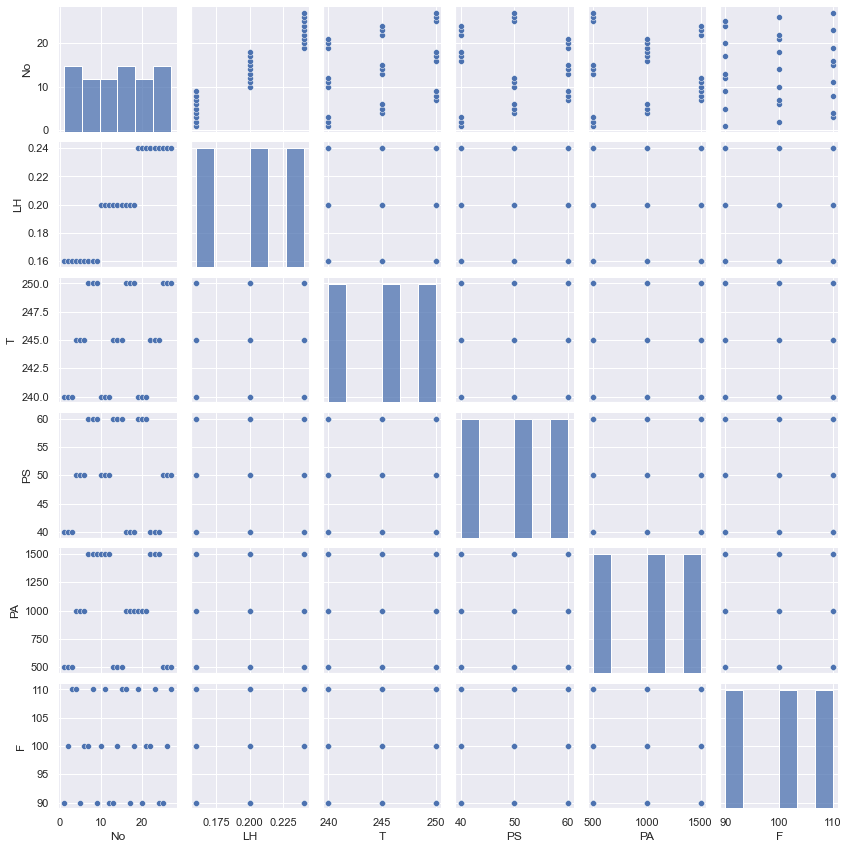

In [10]:
sns.set()
sns.pairplot(data,height = 2, kind='scatter') 
plt.show()

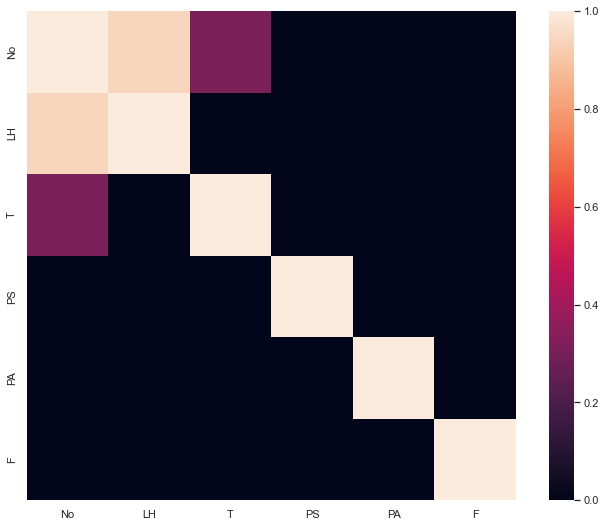

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [12]:
#train model

In [13]:
features=['LH','PA']
feature=data[features].values

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
data.No = data.No.astype('string')

In [16]:
no=data['No'].values

In [17]:
max_depth=2
criterion = 5
min_samples_leaf = 4
max_leaf_nodes = 8

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

In [19]:
tree_clf = tree_clf.fit(feature, no)

In [20]:
tree_clf.predict([[6, 10]])

array(['13.0'], dtype=object)

In [21]:
from sklearn.tree import plot_tree

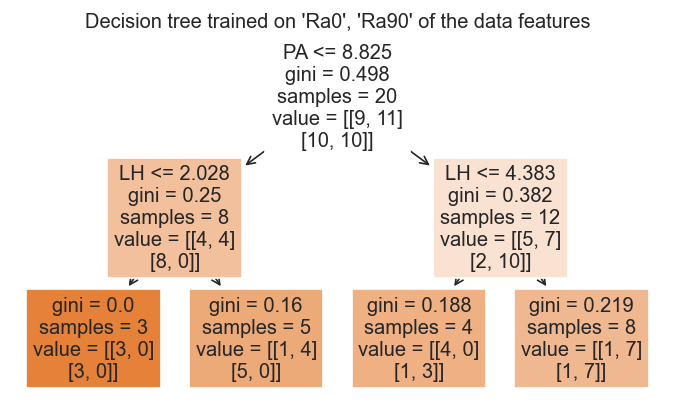

In [85]:
fig_plottree, axes_plottree = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=120)
plot_tree(tree_clf, 
          feature_names=features, 
          class_names=data.No, 
          filled=True)
axes_plottree.set_title("Decision tree trained on 'Ra0', 'Ra90' of the data features")
fig_plottree.savefig('tree.png')

In [23]:
from sklearn.tree import export_text

In [24]:
tree_rules = export_text(tree_clf,feature_names = features)
print(tree_rules)

|--- LH <= 0.18
|   |--- PA <= 750.00
|   |   |--- class: 1.0
|   |--- PA >  750.00
|   |   |--- class: 4.0
|--- LH >  0.18
|   |--- PA <= 750.00
|   |   |--- class: 13.0
|   |--- PA >  750.00
|   |   |--- class: 10.0



In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=data

In [27]:
y=data.No

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state = 5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 6)
(20,)
(7, 6)
(7,)


In [29]:
x_train.head()

,No,LH,T,PS,PA,F
26,27.0,0.24,250.0,50.0,500.0,110.0
24,25.0,0.24,250.0,50.0,500.0,90.0
13,14.0,0.20,245.0,60.0,500.0,100.0
5,6.0,0.16,245.0,50.0,1000.0,100.0
1,2.0,0.16,240.0,40.0,500.0,100.0


In [30]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

tree_clf.fit(x_train, y_train)

y_pred = tree_clf.predict(x_test)

In [31]:
tree_clf.score(x_test, y_test)

0.0

In [32]:
tree_clf.score(x_train, y_train)

0.2

In [33]:
tree_clf.predict_proba(x, check_input=True)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.14285714, 0.14285714, 0.14285714,
        0.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.        , 0.14285714, 0.14285714, 0.14285714, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.14285714, 0.14285714, 0.14285714,
        0.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.        , 0.14285714, 0.14285714, 0.14285714, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [34]:
training_data=pd.read_excel('training_dataset_table4.xlsx')

In [35]:
#data exploration table 4

In [36]:
training_data.head()

,Test,Ra0,Ra0class,Ra90,Ra90class
0,1.0,10.648,Class2,12.240,Class2
1,2.0,0.916,Class1,6.464,Class1
2,3.0,1.126,Class1,9.160,Class1
3,4.0,2.428,Class1,32.994,Class2
4,5.0,1.800,Class1,5.504,Class1


In [37]:
train_data=pd.get_dummies(training_data)
train_data.head()

,Test,Ra0,Ra90,Ra0class_Class1,Ra0class_Class2,Ra90class_Class1,Ra90class_Class2
0,1.0,10.648,12.240,0,1,0,1
1,2.0,0.916,6.464,1,0,1,0
2,3.0,1.126,9.160,1,0,1,0
3,4.0,2.428,32.994,1,0,0,1
4,5.0,1.800,5.504,1,0,1,0


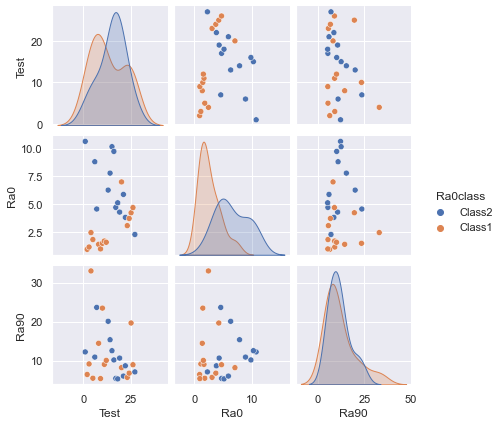

In [38]:
sns.set()
sns.pairplot(training_data,height = 2.0,hue='Ra0class', kind='scatter') 
plt.show()

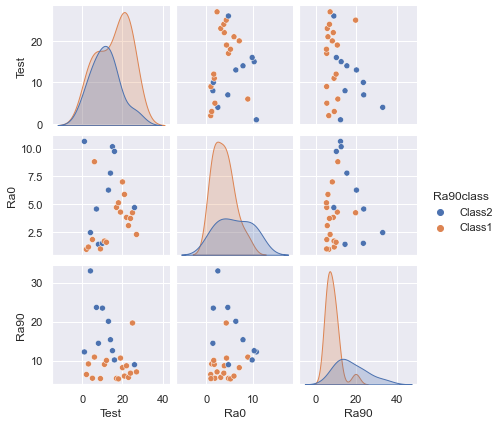

In [39]:
sns.set()
sns.pairplot(training_data,height = 2.0,hue='Ra90class', kind='scatter') 
plt.show()

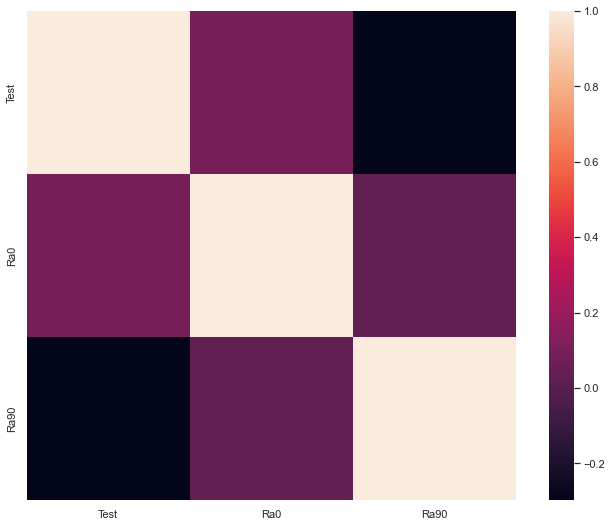

In [40]:
corrmat = training_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [41]:
#train table 4 dataset

In [42]:
response=['Ra0','Ra90']
response=training_data[response].values

In [43]:
dclass=['Ra0class','Ra90class']
dclass=training_data[dclass].values

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(response, dclass, 
                                                    test_size = 0.25, 
                                                    random_state = 5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20, 2)
(20, 2)
(7, 2)
(7, 2)


In [45]:
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

tree_clf.fit(X_train, Y_train)

Y_pred = tree_clf.predict(X_test)

In [46]:
#RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [48]:
rf_model = RandomForestClassifier(n_estimators=50,
                                  max_depth=5, 
                                  random_state=10, 
                                  criterion='gini',
                                  bootstrap = True, 
                                  max_features = 'sqrt')

In [74]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=50,
                       random_state=10)

In [76]:
prediction_RF = rf_model.predict(X_test)

In [51]:
prediction_RF

array([['Class1', 'Class1'],
       ['Class2', 'Class2'],
       ['Class1', 'Class2'],
       ['Class1', 'Class2'],
       ['Class2', 'Class2'],
       ['Class1', 'Class2'],
       ['Class2', 'Class2']], dtype=object)

In [52]:
test=pd.read_excel('testing_table5.xlsx')

In [53]:
test.head()

,Test,Ra0,Ra0class,Ra90,Ra90class
0,1.0,1.026,Class1,4.462,Class1
1,2.0,1.178,Class1,2.656,Class1
2,3.0,2.064,Class1,3.970,Class1
3,4.0,1.126,Class1,7.192,Class1
4,5.0,1.984,Class1,9.240,Class1


In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [72]:
y_pred=y_pred.astype('float')
x_test
Y_pred

array([['Class2', 'Class1'],
       ['Class2', 'Class1'],
       ['Class1', 'Class2'],
       ['Class1', 'Class2'],
       ['Class2', 'Class1'],
       ['Class1', 'Class2'],
       ['Class1', 'Class2']], dtype=object)

In [67]:
labels = test
print(accuracy_score(y_test, y_pred))

0.0


In [81]:
acc_RF = accuracy_score(y_test, prediction_RF)

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

In [82]:
resultsRF = pd.DataFrame({'Method':['Random Forest'],
                          'accuracy':acc_RF})
resultsDf = pd.concat([resultsRF])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

NameError: name 'acc_RF' is not defined